|| JAI BABA KI || || RADHEYKRISHNA ||

In [1]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
tr_data_dir = os.path.join(r'E:\ACC\train')
tr_data = tf.keras.utils.image_dataset_from_directory(
                            tr_data_dir,image_size=(256, 256),  #resize image to 256*256
                            seed = 12332
                            ) 
# i randomly shuffled data with seed
# i'll do automatic feature extraction later usiing filtering and pooling layers

Found 791 files belonging to 2 classes.


In [ ]:
#i can't access this data directly by data[0] ; this will give us an error
#i have to get an iterator for this & call iterator to get each batch of 32  images 

tr_data_iterator = tr_data.as_numpy_iterator()
tr_batch = tr_data_iterator.next()

In [ ]:
len(tr_batch[0]) # this gives no. of images in training Batch

32

DATASET VISUALIZATION

In [6]:
def label_to_category(label):
    if(label == 1):
        return "No Accident"
    elif label == 0:
        return "Accident"
    else :
        return "error"

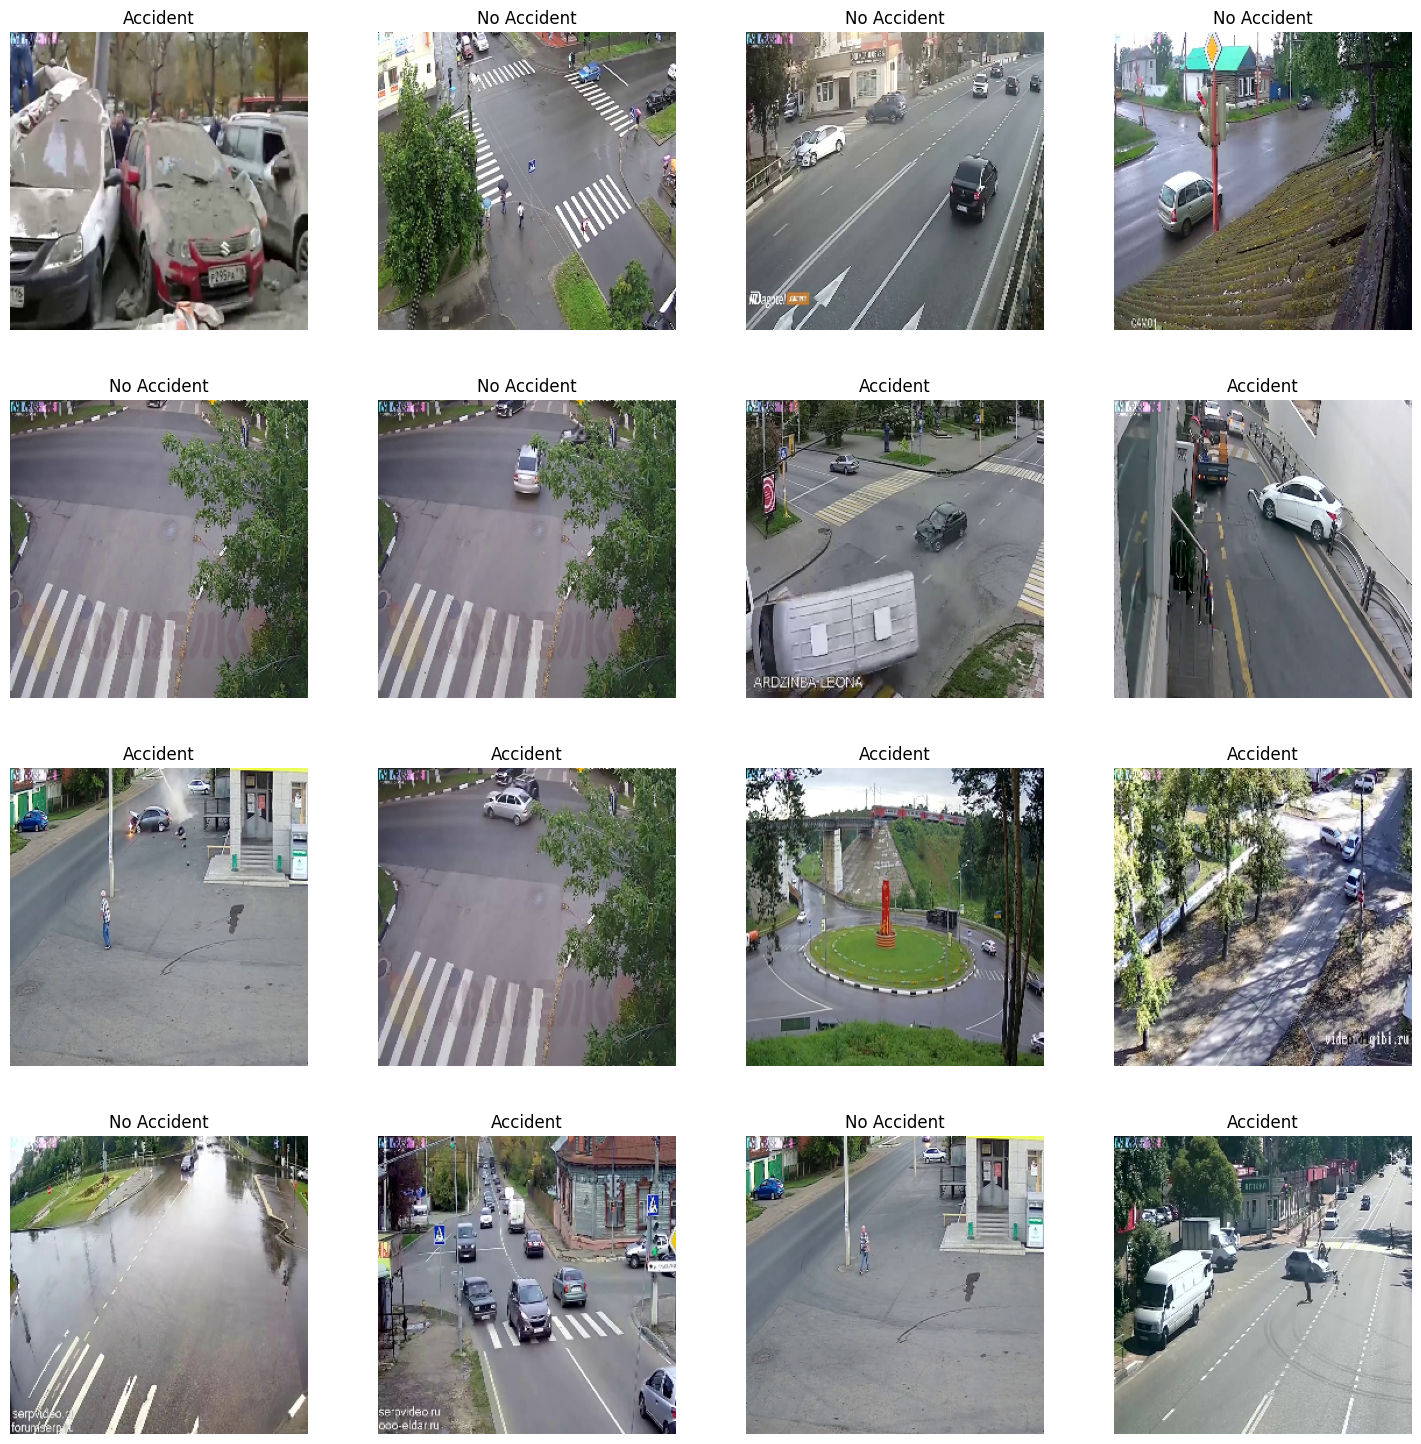

In [ ]:
#plot of 16 images(batch)
cols = 4 
rows = 4
fig, ax = plt.subplots(nrows= rows , ncols= cols,figsize=(15,15),layout='constrained')
fig.tight_layout(pad=2)
for outer_index, img in enumerate(tr_batch[0][:]):
    if outer_index >= rows*cols:
        break
    if (outer_index % cols == 0):
        for inner_index, img in enumerate(tr_batch[0][outer_index:outer_index+cols]):
            ax[outer_index//cols][inner_index].imshow(img.astype(int))
            label = label_to_category(tr_batch[1][outer_index + inner_index])        
            ax[outer_index//cols][inner_index].set_aspect(1)
            num_label = tr_batch[1][outer_index + inner_index]
            ax[outer_index//cols][inner_index].axis("off")
            ax[outer_index//cols][inner_index].title.set_text(label)
plt.savefig("test.png")       
plt.show()

PREPROCESSING DATA

In [8]:
# Normalizing pixels value between between 0 & 1 
tr_data = tr_data.map(lambda x,y: (x/255, y))

In [9]:
tr_batch = tr_data.as_numpy_iterator().next()

In [10]:
# Checking pixel min/max pixel values after normalization
print("Max pixel value : ",tr_batch[0].max())
print("Min pixel value : ",tr_batch[0].min())

Max pixel value :  1.0
Min pixel value :  0.0


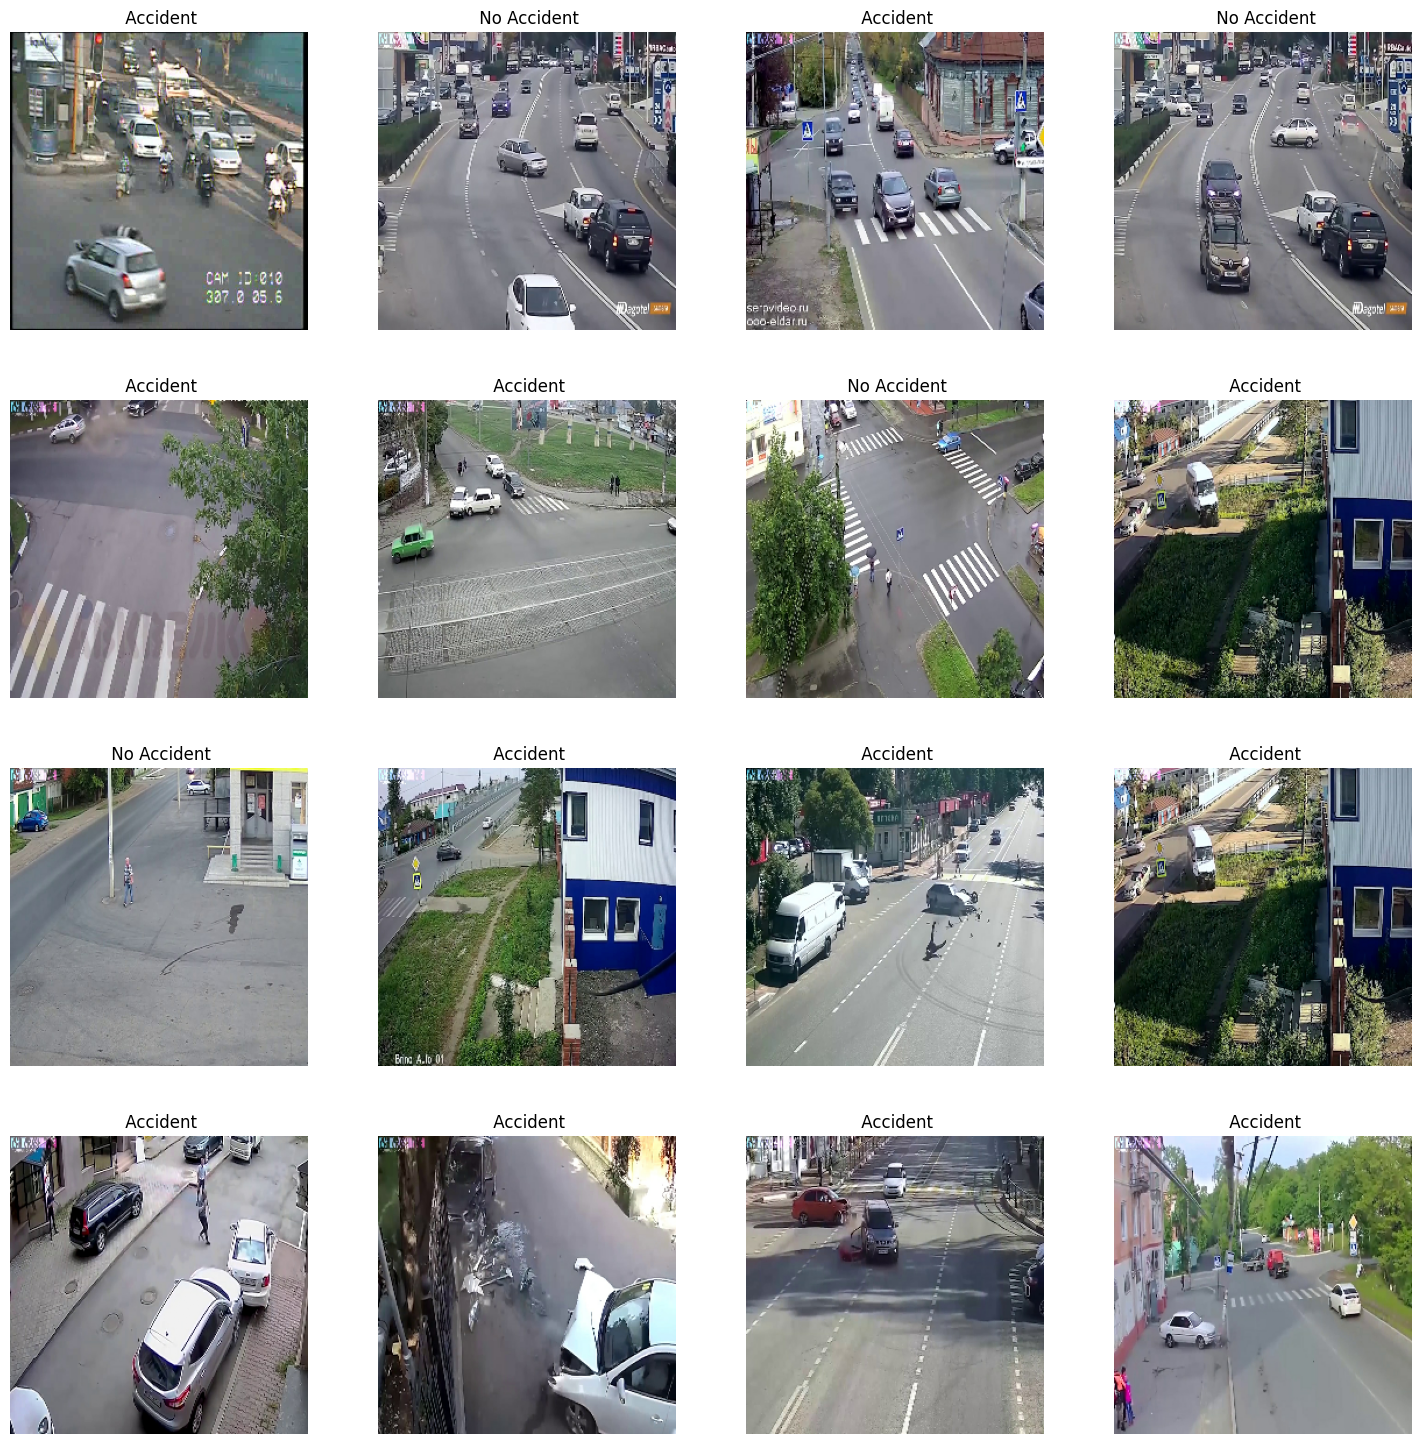

In [11]:
#lets see training data after normalization

cols = 4
rows = 4
fig, ax = plt.subplots(nrows= rows , ncols= cols,figsize=(15,15),layout='constrained')
fig.tight_layout(pad=2)



for outer_index, img in enumerate(tr_batch[0][:]):
    if outer_index >= rows*cols:
        break
        
    if (outer_index % cols == 0):
        for inner_index, img in enumerate(tr_batch[0][outer_index:outer_index+cols]):
    
        
            ax[outer_index//cols][inner_index].imshow(img)
            if(tr_batch[1][outer_index + inner_index] == 0):
               label = " Accident"
            else: label = " No Accident"
            ax[outer_index//cols][inner_index].set_aspect(1)

            num_label = tr_batch[1][outer_index + inner_index]
            
            ax[outer_index//cols][inner_index].axis("off")
            ax[outer_index//cols][inner_index].title.set_text(label)
            

plt.savefig("test.png")       
plt.show()

LOADING VALIDATION DATA FOR HYPERPARAMETER TUNING

In [13]:
val_data_dir = os.path.join(r'E:\ACC\val')
val_data = tf.keras.utils.image_dataset_from_directory(val_data_dir)
val_data_iterator = val_data.as_numpy_iterator()
val_batch = val_data_iterator.next()

Found 98 files belonging to 2 classes.


In [14]:
# Normalizing Validation data
val_data = val_data.map(lambda x,y: (x/255, y))
val_batch = val_data.as_numpy_iterator().next()

CNN BUILDING

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [16]:
model = Sequential()


In [17]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
# Adding neural Layer
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [19]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

TRAINING NEURAL NETWORK

In [20]:
# setting up for logging 
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [21]:
hist = model.fit(tr_data, epochs=20, validation_data=val_data, callbacks=[tensorboard_callback])
#model.save("/kaggle/working/accidents.keras") 

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 387ms/step - accuracy: 0.5135 - loss: 0.8596 - val_accuracy: 0.6020 - val_loss: 0.6579
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 258ms/step - accuracy: 0.6534 - loss: 0.6520 - val_accuracy: 0.7143 - val_loss: 0.5622
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 253ms/step - accuracy: 0.7170 - loss: 0.5844 - val_accuracy: 0.7857 - val_loss: 0.4664
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step - accuracy: 0.7622 - loss: 0.4932 - val_accuracy: 0.8878 - val_loss: 0.4268
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 301ms/step - accuracy: 0.8328 - loss: 0.4068 - val_accuracy: 0.8878 - val_loss: 0.3410
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 250ms/step - accuracy: 0.9018 - loss: 0.2992 - val_accuracy: 0.8673 - val_loss: 0.3182
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 253ms/step - accuracy: 0.9038 - loss: 0.2589 - val_accuracy: 0.8878 - val_loss: 0.2801
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 249ms/step - accuracy: 0.9325 - loss: 0.1876 - val_accuracy: 0

In [22]:
hist.history

{'accuracy': [0.533501923084259,
  0.6864728331565857,
  0.7269279360771179,
  0.7686472535133362,
  0.8293299674987793,
  0.8761062026023865,
  0.9026548862457275,
  0.9380530714988708,
  0.9418457746505737,
  0.9418457746505737,
  0.9608091115951538,
  0.9671302437782288,
  0.9570164084434509,
  0.983565092086792,
  0.9810366630554199,
  0.9683944582939148,
  0.9734513163566589,
  0.983565092086792,
  0.982300877571106,
  0.9772440195083618],
 'loss': [0.7498103976249695,
  0.632754385471344,
  0.57100909948349,
  0.4631264805793762,
  0.38809934258461,
  0.3220509886741638,
  0.2430517077445984,
  0.1683126538991928,
  0.17529551684856415,
  0.1678379476070404,
  0.12290063500404358,
  0.10695476830005646,
  0.11970778554677963,
  0.06149033084511757,
  0.057133715599775314,
  0.0873931497335434,
  0.07687177509069443,
  0.058307502418756485,
  0.059392329305410385,
  0.05831041932106018],
 'val_accuracy': [0.6020408272743225,
  0.7142857313156128,
  0.7857142686843872,
  0.88775509

loss and accuracy curve with epochs (training wale)

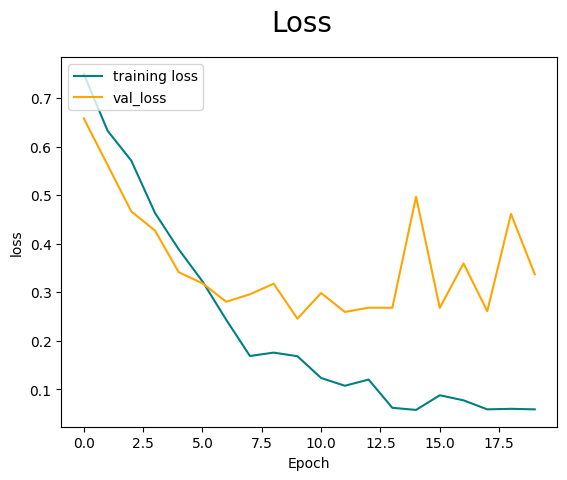

In [23]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='training loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()

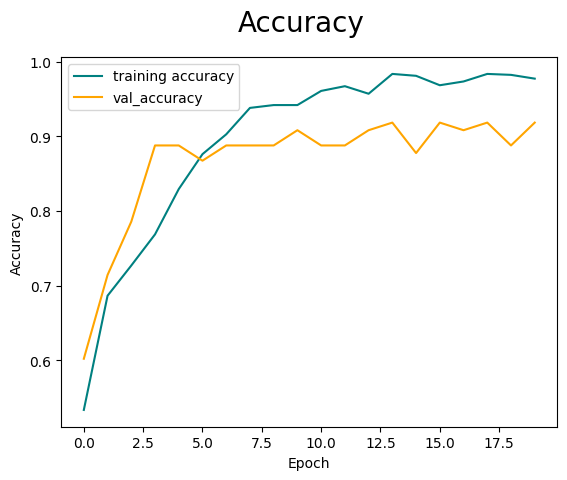

In [24]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='training accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

evaluation

In [26]:
test_data_dir = os.path.join(r'E:\ACC\test')
test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir)
test_data_iterator = test_data.as_numpy_iterator()
test_batch = test_data_iterator.next()

Found 100 files belonging to 2 classes.


In [27]:
pre = tf.keras.metrics.Precision
re = tf.keras.metrics.Recall()

In [28]:
pre = tf.keras.metrics.Precision()
re = tf.keras.metrics.Recall()

for batch in test_data:
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


In [29]:
def F1_score(precision, recall):
    return (2*precision*recall)/(precision+recall)

In [30]:
print("Model achieved an precision score of {:5f}".format(pre.result()))
print("Model achieved an recall score of {:5f}".format(re.result()))

Model achieved an precision score of 0.907407
Model achieved an recall score of 0.924528


In [31]:
f1_score = F1_score(pre.result(), re.result())
print("Model achieved an F1-score of {:5f}".format(f1_score))

Model achieved an F1-score of 0.915888


model working (test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


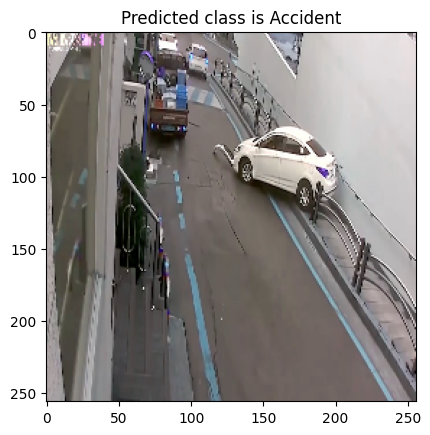

In [33]:
import cv2

# load random samples from samples directory
#random_data_dirname = os.path.join("/kaggle/input/accident-detection-from-cctv-footage/data/test/Accident")
random_data_dirname = os.path.join(r'E:\ACC\test\Accident')
pics = [os.path.join(random_data_dirname, filename) for filename in os.listdir(random_data_dirname)]

# load first file from samples
sample = cv2.imread(pics[1], cv2.IMREAD_COLOR)
sample = cv2.resize(sample, (256, 256))

prediction = 1 - model.predict(np.expand_dims(sample/255, 0))

if prediction >= 0.5: 
    label = 'Predicted class is Accident'
else:
    label = 'Predicted class is Not Accident'

plt.title(label)
plt.imshow(sample)
plt.show()

creating csv file for submission

In [35]:
import cv2
import pandas as pd

# load random samples from samples directory
test_data_dirname = os.path.join(r'E:\ACC\test')
pics = [os.path.join(test_data_dirname, filename) for filename in os.listdir(test_data_dirname)]


filenames = []
predictions = []
for dirname in os.listdir(test_data_dirname):
    for filename in os.listdir(os.path.join(test_data_dirname, dirname)):
        if not filename.endswith(".jpg"):
            continue
        filepath = os.path.join(test_data_dirname, dirname, filename)
        
        # load first file from samples
        sample = cv2.imread(filepath, cv2.IMREAD_COLOR)
        sample = cv2.resize(sample, (256, 256))
        
        # predict using model
        prediction = 1 - model.predict(np.expand_dims(sample/255, 0))
        # done because when we loaded data by default 0 label is given to first folder
        # which is Accident but we want just opposite labels
        # we want 0: Accident and 1: Not Accident
        
        filenames.append(filename)
        output = 1 if float(prediction[0][0]) >= 0.5 else 0
        predictions.append(output)

df = pd.DataFrame(columns=["ID", "Column ID"])
df["ID"] = filenames
df["Column ID"] = predictions
df.to_csv(r'E:\ACC\submission.csv',index=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━